## Intro to Pandas

In [1]:
import pandas as pd

In [2]:
a = pd.Series()

/tmp/ipykernel_1442/1773785892.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series()


In [3]:
temperatures = [5, 62, 53, 63,99, 20]
series = pd.Series(temperatures)

In [4]:
series

0     5
1    62
2    53
3    63
4    99
5    20
dtype: int64

In [5]:
type(series)

pandas.core.series.Series

In [6]:
series.describe()

count     6.000000
mean     50.333333
std      33.607539
min       5.000000
25%      28.250000
50%      57.500000
75%      62.750000
max      99.000000
dtype: float64

In [7]:
series.unique()

array([ 5, 62, 53, 63, 99, 20])

In [8]:
series[4]

99

In [9]:
series + 1

0      6
1     63
2     54
3     64
4    100
5     21
dtype: int64

In [10]:
series.sort_values()

0     5
5    20
2    53
1    62
3    63
4    99
dtype: int64

In [11]:
series.where(series > 70)

0     NaN
1     NaN
2     NaN
3     NaN
4    99.0
5     NaN
dtype: float64

In [12]:
series.mask(series >69)

0     5.0
1    62.0
2    53.0
3    63.0
4     NaN
5    20.0
dtype: float64

In [13]:
series.pop(4)

99

In [14]:
series

0     5
1    62
2    53
3    63
5    20
dtype: int64

In [18]:
series = series.drop(0)

In [19]:
series.reset_index(drop = True, inplace = True)

In [20]:
series

0    62
1    53
2    63
3    20
dtype: int64

In [22]:
import numpy as np

temp = np.random.randint(0,100, size=9)
series2 = pd.Series(temp)
series2

0    68
1    62
2    26
3    64
4    88
5    17
6    67
7    17
8    30
dtype: int64

In [23]:
%timeit -n1 series+series2

The slowest run took 66.22 times longer than the fastest. This could mean that an intermediate result is being cached.
5.31 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
series+series2

0    130.0
1    115.0
2     89.0
3     84.0
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
dtype: float64

In [25]:
%timeit -q series.add(series2)

In [26]:
%timeit -r2 series*series2

458 µs ± 1.35 µs per loop (mean ± std. dev. of 2 runs, 1,000 loops each)


In [27]:
%timeit -p5 series.mul(series2)

343.27 µs ± 31.272 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [28]:
series.mean()

49.5

In [29]:
series2.mean()

48.77777777777778

In [30]:
series.std()

20.174241001832016

In [31]:
series2.sum()

439

In [32]:
series.var()

407.0

In [33]:
series.describe()

count     4.000000
mean     49.500000
std      20.174241
min      20.000000
25%      44.750000
50%      57.500000
75%      62.250000
max      63.000000
dtype: float64

## Dataframes

In [35]:
day = pd.Series(np.arange(1,10))

df = pd.DataFrame({ 'Day': day, 'Temp': temp})

In [36]:
df

,Day,Temp
0,1,68
1,2,62
2,3,26
3,4,64
4,5,88
5,6,17
6,7,67
7,8,17
8,9,30


In [37]:
df.describe()

,Day,Temp
count,9.000000,9.000000
mean,5.000000,48.777778
std,2.738613,26.309588
min,1.000000,17.000000
25%,3.000000,26.000000
50%,5.000000,62.000000
75%,7.000000,67.000000
max,9.000000,88.000000


In [38]:
pd.read_json("https://oudatalab.com/cs5293sp23/documents/tweets.json", lines=True)

,_id,retweetCount,text,created_at,user,action,gnip,location,geo
0,302658340964663296,0,""" His palms are sweaty, knees weak, arms are h...",{'$date': 1360994346000},"{'utc_offset': '-18000', 'statuses_count': 254...",post,"{'matching_rules': [{'tag': None, 'value': 'vo...",NaN,NaN
1,302658372166094848,0,@LaycNichole @tantanns that's so gross. Haha k...,{'$date': 1360994353000},"{'utc_offset': '-28800', 'statuses_count': 163...",post,"{'matching_rules': [{'tag': None, 'value': 'vo...",NaN,NaN
2,302658375089532928,0,"Cuando una chica llama a su novio “papi”, me d...",{'$date': 1360994354000},"{'statuses_count': 5666, 'description': 'follo...",post,"{'matching_rules': [{'tag': None, 'value': 'vo...",NaN,NaN
3,302658377811632128,0,@RocioCalabrese jajajajjajajaj salgo re pasado...,{'$date': 1360994355000},"{'statuses_count': 3118, 'friends_count': 76, ...",post,"{'matching_rules': [{'tag': None, 'value': 'vo...",NaN,NaN
4,302658383725600768,0,"His palms are sweaty, knees weak, arms are hea...",{'$date': 1360994356000},"{'utc_offset': '-28800', 'statuses_count': 903...",post,"{'matching_rules': [{'tag': None, 'value': 'vo...",NaN,NaN
...,...,...,...,...,...,...,...,...,...
10967,302826725140750336,0,If you cant clean up vomit you arent ready for...,{'$date': 1361034492000},"{'utc_offset': '-14400', 'statuses_count': 125...",post,"{'matching_rules': [{'tag': None, 'value': 'vo...",NaN,NaN
10968,302826725627281408,0,"A mãe ta fazendo doce de goiaba, só o cheiro j...",{'$date': 1361034492000},"{'utc_offset': '-36000', 'statuses_count': 239...",post,"{'matching_rules': [{'tag': None, 'value': 'vo...",NaN,NaN
10969,302826734062010368,0,"minha mãe comprou uma caixa de almôndegas, aí ...",{'$date': 1361034494000},"{'utc_offset': '-10800', 'hashtags': [], 'stat...",post,"{'matching_rules': [{'tag': None, 'value': 'vo...",NaN,NaN
10970,302826742278651904,0,That sour plum always help me to 消化 so that I ...,{'$date': 1361034496000},"{'utc_offset': '-32400', 'statuses_count': 329...",post,"{'matching_rules': [{'tag': None, 'value': 'vo...",NaN,NaN


In [39]:
pd.read_csv("https://oudatalab.com/cs5293sp23/documents/deniro.csv")


,Year,Score,Title
0,1968,86,Greetings
1,1970,17,Bloody Mama
2,1971,40,Born to Win
3,1973,98,Mean Streets
4,1973,88,Bang the Drum Slowly
...,...,...,...
81,2014,9,"""The Bag Man"""
82,2015,60,Joy
83,2015,26,Heist
84,2015,61,The Intern


In [40]:
df1 = pd.read_csv("https://oudatalab.com/cs5293sp23/documents/salesjan2009.csv")

In [41]:
df1

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude,US Zip
0,01/02/2009 04:53,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/2009 04:42,1/2/2009 07:49,39.195000,-94.681940,64152.0
1,01/02/2009 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/2009 16:21,1/3/2009 12:32,46.188060,-123.830000,97103.0
2,01/04/2009 12:56,Product2,3600,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/2009 12:45,33.520560,-86.802500,35243.0
3,01/04/2009 13:19,Product1,1200,Visa,LAURENCE,Mickleton,NJ,United States,9/24/08 15:19,1/4/2009 13:04,39.790000,-75.238060,8056.0
4,01/04/2009 20:11,Product1,1200,Mastercard,Fleur,Peoria,IL,United States,1/3/2009 09:38,1/4/2009 19:45,40.693610,-89.588890,61601.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,01/02/2009 17:24,Product2,3600,Diners,clara,Perth,Western Australia,Australia,1/1/2009 21:20,2/27/2009 18:43,-31.933333,115.833333,NaN
994,01/04/2009 18:57,Product1,1200,Mastercard,KELI,Worongary,Queensland,Australia,12/23/08 15:17,2/28/2009 14:00,-28.050000,153.350000,NaN
995,01/23/2009 12:42,Product2,3600,Mastercard,Anke,Avalon,New South Wales,Australia,3/3/08 17:38,2/28/2009 22:26,-33.633333,151.333333,NaN
996,01/07/2009 19:48,Product2,3600,Mastercard,TRICIA,Sydney,New South Wales,Australia,9/21/08 20:49,3/1/2009 00:14,-33.883333,151.216667,NaN


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  998 non-null    object 
 1   Product           998 non-null    object 
 2   Price             998 non-null    int64  
 3   Payment_Type      998 non-null    object 
 4   Name              998 non-null    object 
 5   City              998 non-null    object 
 6   State             989 non-null    object 
 7   Country           998 non-null    object 
 8   Account_Created   998 non-null    object 
 9   Last_Login        998 non-null    object 
 10  Latitude          998 non-null    float64
 11  Longitude         998 non-null    float64
 12  US Zip            463 non-null    float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.5+ KB


In [43]:
df1.describe()

,Price,Latitude,Longitude,US Zip
count,998.000000,998.000000,998.000000,463.000000
mean,1633.767535,39.015705,-41.337820,49686.758099
std,1156.034724,19.508572,67.389479,32895.348013
min,250.000000,-41.465000,-159.485280,802.000000
25%,1200.000000,35.816944,-87.991670,20396.500000
50%,1200.000000,42.320695,-73.730695,43606.000000
75%,1200.000000,51.050000,4.916667,84103.000000
max,13000.000000,64.837780,174.766667,99835.000000


In [44]:
df1.head()

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude,US Zip
0,01/02/2009 04:53,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/2009 04:42,1/2/2009 07:49,39.19500,-94.68194,64152.0
1,01/02/2009 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/2009 16:21,1/3/2009 12:32,46.18806,-123.83000,97103.0
2,01/04/2009 12:56,Product2,3600,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/2009 12:45,33.52056,-86.80250,35243.0
3,01/04/2009 13:19,Product1,1200,Visa,LAURENCE,Mickleton,NJ,United States,9/24/08 15:19,1/4/2009 13:04,39.79000,-75.23806,8056.0
4,01/04/2009 20:11,Product1,1200,Mastercard,Fleur,Peoria,IL,United States,1/3/2009 09:38,1/4/2009 19:45,40.69361,-89.58889,61601.0


In [45]:
df1.tail()

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude,US Zip
993,01/02/2009 17:24,Product2,3600,Diners,clara,Perth,Western Australia,Australia,1/1/2009 21:20,2/27/2009 18:43,-31.933333,115.833333,NaN
994,01/04/2009 18:57,Product1,1200,Mastercard,KELI,Worongary,Queensland,Australia,12/23/08 15:17,2/28/2009 14:00,-28.050000,153.350000,NaN
995,01/23/2009 12:42,Product2,3600,Mastercard,Anke,Avalon,New South Wales,Australia,3/3/08 17:38,2/28/2009 22:26,-33.633333,151.333333,NaN
996,01/07/2009 19:48,Product2,3600,Mastercard,TRICIA,Sydney,New South Wales,Australia,9/21/08 20:49,3/1/2009 00:14,-33.883333,151.216667,NaN
997,01/25/2009 05:57,Product1,1200,Amex,pamela,Ayacucho,Buenos Aires,Argentina,1/24/2009 09:29,2/10/2009 06:38,-37.150000,-58.483333,NaN


In [47]:
df1.sample(n=5)

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude,US Zip
797,01/11/2009 09:50,Product1,1200,Visa,Bato,Munchengosserstadt,Thuringia,Germany,1/7/2009 11:45,2/10/2009 10:28,51.050000,11.65000,NaN
86,01/18/2009 23:17,Product1,1200,Visa,Greg,Washington,DC,United States,1/18/2009 15:18,1/19/2009 06:13,38.895000,-77.03667,20004.0
21,01/09/2009 06:39,Product1,1200,Mastercard,Anneli,Houston,TX,United States,1/9/2009 05:09,1/9/2009 07:11,29.763060,-95.36306,77002.0
686,01/16/2009 07:58,Product1,1200,Amex,Darrah,Den Haag,Zuid-Holland,Netherlands,9/30/07 4:03,2/13/2009 03:05,52.083333,4.30000,NaN
229,01/15/2009 09:52,Product1,1200,Amex,Mark,Holmdel,NJ,United States,1/15/2009 08:36,2/2/2009 07:00,40.345000,-74.18444,7733.0


In [48]:
df1.isnull().sum()

Transaction_date      0
Product               0
Price                 0
Payment_Type          0
Name                  0
City                  0
State                 9
Country               0
Account_Created       0
Last_Login            0
Latitude              0
Longitude             0
US Zip              535
dtype: int64

In [49]:
df1['Name']

0                 Betina
1      Federica e Andrea
2                 Gerd W
3               LAURENCE
4                  Fleur
             ...        
993                clara
994                 KELI
995                 Anke
996               TRICIA
997               pamela
Name: Name, Length: 998, dtype: object

In [50]:
df1.Name

0                 Betina
1      Federica e Andrea
2                 Gerd W
3               LAURENCE
4                  Fleur
             ...        
993                clara
994                 KELI
995                 Anke
996               TRICIA
997               pamela
Name: Name, Length: 998, dtype: object

In [54]:
df1['Name'],df1['City']

(0                 Betina
 1      Federica e Andrea
 2                 Gerd W
 3               LAURENCE
 4                  Fleur
              ...        
 993                clara
 994                 KELI
 995                 Anke
 996               TRICIA
 997               pamela
 Name: Name, Length: 998, dtype: object,
 0           Parkville
 1             Astoria
 2      Cahaba Heights
 3           Mickleton
 4              Peoria
             ...      
 993             Perth
 994         Worongary
 995            Avalon
 996            Sydney
 997          Ayacucho
 Name: City, Length: 998, dtype: object)

In [57]:
df1.iloc[1:3]

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude,US Zip
1,01/02/2009 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/2009 16:21,1/3/2009 12:32,46.18806,-123.8300,97103.0
2,01/04/2009 12:56,Product2,3600,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/2009 12:45,33.52056,-86.8025,35243.0


In [58]:
df1.iloc[[1,3]]

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude,US Zip
1,01/02/2009 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/2009 16:21,1/3/2009 12:32,46.18806,-123.83000,97103.0
3,01/04/2009 13:19,Product1,1200,Visa,LAURENCE,Mickleton,NJ,United States,9/24/08 15:19,1/4/2009 13:04,39.79000,-75.23806,8056.0


In [59]:
df1.loc[2, 'Name']

'Gerd W'

In [60]:
df1.loc[[2,3], ['Name', 'City']]

,Name,City
2,Gerd W,Cahaba Heights
3,LAURENCE,Mickleton


In [62]:
df1.loc[6, 'City'] = 'Norman'

In [63]:
df1.loc[6, 'City']

'Norman'

In [64]:
df1['Price'] /= 10
df1

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude,US Zip
0,01/02/2009 04:53,Product1,120.0,Visa,Betina,Parkville,MO,United States,1/2/2009 04:42,1/2/2009 07:49,39.195000,-94.681940,64152.0
1,01/02/2009 13:08,Product1,120.0,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/2009 16:21,1/3/2009 12:32,46.188060,-123.830000,97103.0
2,01/04/2009 12:56,Product2,360.0,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/2009 12:45,33.520560,-86.802500,35243.0
3,01/04/2009 13:19,Product1,120.0,Visa,LAURENCE,Mickleton,NJ,United States,9/24/08 15:19,1/4/2009 13:04,39.790000,-75.238060,8056.0
4,01/04/2009 20:11,Product1,120.0,Mastercard,Fleur,Peoria,IL,United States,1/3/2009 09:38,1/4/2009 19:45,40.693610,-89.588890,61601.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,01/02/2009 17:24,Product2,360.0,Diners,clara,Perth,Western Australia,Australia,1/1/2009 21:20,2/27/2009 18:43,-31.933333,115.833333,NaN
994,01/04/2009 18:57,Product1,120.0,Mastercard,KELI,Worongary,Queensland,Australia,12/23/08 15:17,2/28/2009 14:00,-28.050000,153.350000,NaN
995,01/23/2009 12:42,Product2,360.0,Mastercard,Anke,Avalon,New South Wales,Australia,3/3/08 17:38,2/28/2009 22:26,-33.633333,151.333333,NaN
996,01/07/2009 19:48,Product2,360.0,Mastercard,TRICIA,Sydney,New South Wales,Australia,9/21/08 20:49,3/1/2009 00:14,-33.883333,151.216667,NaN


In [67]:
df1['Price_Mod'] = df1['Price'] / 10

In [68]:
df1

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude,US Zip,Price_Mod
0,01/02/2009 04:53,Product1,120.0,Visa,Betina,Parkville,MO,United States,1/2/2009 04:42,1/2/2009 07:49,39.195000,-94.681940,64152.0,12.0
1,01/02/2009 13:08,Product1,120.0,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/2009 16:21,1/3/2009 12:32,46.188060,-123.830000,97103.0,12.0
2,01/04/2009 12:56,Product2,360.0,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/2009 12:45,33.520560,-86.802500,35243.0,36.0
3,01/04/2009 13:19,Product1,120.0,Visa,LAURENCE,Mickleton,NJ,United States,9/24/08 15:19,1/4/2009 13:04,39.790000,-75.238060,8056.0,12.0
4,01/04/2009 20:11,Product1,120.0,Mastercard,Fleur,Peoria,IL,United States,1/3/2009 09:38,1/4/2009 19:45,40.693610,-89.588890,61601.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,01/02/2009 17:24,Product2,360.0,Diners,clara,Perth,Western Australia,Australia,1/1/2009 21:20,2/27/2009 18:43,-31.933333,115.833333,NaN,36.0
994,01/04/2009 18:57,Product1,120.0,Mastercard,KELI,Worongary,Queensland,Australia,12/23/08 15:17,2/28/2009 14:00,-28.050000,153.350000,NaN,12.0
995,01/23/2009 12:42,Product2,360.0,Mastercard,Anke,Avalon,New South Wales,Australia,3/3/08 17:38,2/28/2009 22:26,-33.633333,151.333333,NaN,36.0
996,01/07/2009 19:48,Product2,360.0,Mastercard,TRICIA,Sydney,New South Wales,Australia,9/21/08 20:49,3/1/2009 00:14,-33.883333,151.216667,NaN,36.0


In [69]:
df1.Product.replace('Product1', 'MyProduct')

0      MyProduct
1      MyProduct
2       Product2
3      MyProduct
4      MyProduct
         ...    
993     Product2
994    MyProduct
995     Product2
996     Product2
997    MyProduct
Name: Product, Length: 998, dtype: object

In [70]:
df1.Price.replace(120.0, 110.0)

0      110.0
1      110.0
2      360.0
3      110.0
4      110.0
       ...  
993    360.0
994    110.0
995    360.0
996    360.0
997    110.0
Name: Price, Length: 998, dtype: float64

In [71]:
df1.isnull().sum()

Transaction_date      0
Product               0
Price                 0
Payment_Type          0
Name                  0
City                  0
State                 9
Country               0
Account_Created       0
Last_Login            0
Latitude              0
Longitude             0
US Zip              535
Price_Mod             0
dtype: int64

In [72]:
df1['US Zip'].fillna("00000")

0      64152.0
1      97103.0
2      35243.0
3       8056.0
4      61601.0
        ...   
993      00000
994      00000
995      00000
996      00000
997      00000
Name: US Zip, Length: 998, dtype: object

## Queries and Groups

In [74]:
df1.query('Account_Created >= Last_Login')

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude,US Zip,Price_Mod
2,01/04/2009 12:56,Product2,360.0,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/2009 12:45,33.520560,-86.802500,35243.0,36.0
3,01/04/2009 13:19,Product1,120.0,Visa,LAURENCE,Mickleton,NJ,United States,9/24/08 15:19,1/4/2009 13:04,39.790000,-75.238060,8056.0,12.0
8,01/05/2009 10:08,Product1,120.0,Visa,Georgia,Eagle,ID,United States,11/11/08 15:53,1/5/2009 10:05,43.695560,-116.353060,83616.0,12.0
9,01/02/2009 14:18,Product1,120.0,Visa,Richard,Riverside,NJ,United States,12/9/08 12:07,1/5/2009 11:01,40.032220,-74.957780,8075.0,12.0
10,01/02/2009 07:35,Product1,120.0,Diners,Hani,Salt Lake City,UT,United States,12/30/08 5:44,1/6/2009 10:52,40.760830,-111.890280,84111.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,01/19/2009 01:52,Product1,120.0,Amex,Kirsten,Melbourne,Victoria,Australia,4/24/07 4:36,2/17/2009 01:20,-37.816667,144.966667,NaN,12.0
989,01/14/2009 00:03,Product2,360.0,Mastercard,Piret,Bunbury,Western Australia,Australia,6/16/08 18:22,2/17/2009 19:31,-33.333333,115.633333,NaN,36.0
991,01/23/2009 21:35,Product1,120.0,Visa,Ann,Brisbane,Queensland,Australia,4/21/07 19:33,2/18/2009 23:12,-27.500000,153.016667,NaN,12.0
995,01/23/2009 12:42,Product2,360.0,Mastercard,Anke,Avalon,New South Wales,Australia,3/3/08 17:38,2/28/2009 22:26,-33.633333,151.333333,NaN,36.0


In [75]:
df1.groupby("State").size()

State
AK                  5
AL                  1
AR                  3
AZ                 10
Aargau              2
                   ..
Wicklow             2
Yukon Territory     1
Zug                 2
Zuid-Holland       10
Zurich              8
Length: 201, dtype: int64

In [76]:
df1.groupby("State").count()

,Transaction_date,Product,Price,Payment_Type,Name,City,Country,Account_Created,Last_Login,Latitude,Longitude,US Zip,Price_Mod
State,,,,,,,,,,,,,
AK,5,5,5,5,5,5,5,5,5,5,5,5,5
AL,1,1,1,1,1,1,1,1,1,1,1,1,1
AR,3,3,3,3,3,3,3,3,3,3,3,3,3
AZ,10,10,10,10,10,10,10,10,10,10,10,10,10
Aargau,2,2,2,2,2,2,2,2,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wicklow,2,2,2,2,2,2,2,2,2,2,2,0,2
Yukon Territory,1,1,1,1,1,1,1,1,1,1,1,0,1
Zug,2,2,2,2,2,2,2,2,2,2,2,0,2


In [77]:
df1.groupby("State")['State'].count()

State
AK                  5
AL                  1
AR                  3
AZ                 10
Aargau              2
                   ..
Wicklow             2
Yukon Territory     1
Zug                 2
Zuid-Holland       10
Zurich              8
Name: State, Length: 201, dtype: int64

In [82]:
df1.groupby('Name')['Name'].count().sort_values(ascending=False)

Name
Sarah             11
Lisa              10
Elizabeth         10
Nicole             9
Kim                7
                  ..
Jannik             1
Jasinta Jeanne     1
Jean               1
Jeannette          1
verena             1
Name: Name, Length: 742, dtype: int64

In [89]:
df1.groupby('State')['Name'].count()

State
AK                  5
AL                  1
AR                  3
AZ                 10
Aargau              2
                   ..
Wicklow             2
Yukon Territory     1
Zug                 2
Zuid-Holland       10
Zurich              8
Name: Name, Length: 201, dtype: int64

In [90]:
df1.groupby('Product')['Price'].max().sort_values(ascending=True)

Product
Product2     360.0
Product3     750.0
Product1    1300.0
Name: Price, dtype: float64

## Visualizations

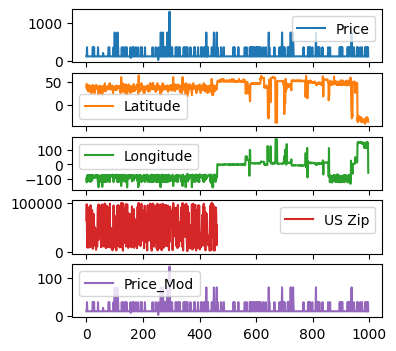

In [93]:
df1.plot(subplots = True, figsize=(4,4));

<Axes: ylabel='Frequency'>

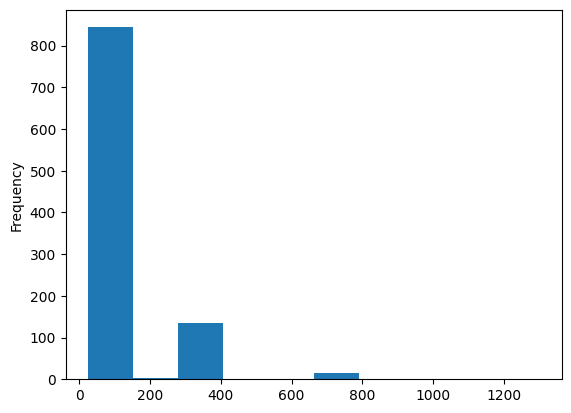

In [92]:
df1['Price'].plot.hist()

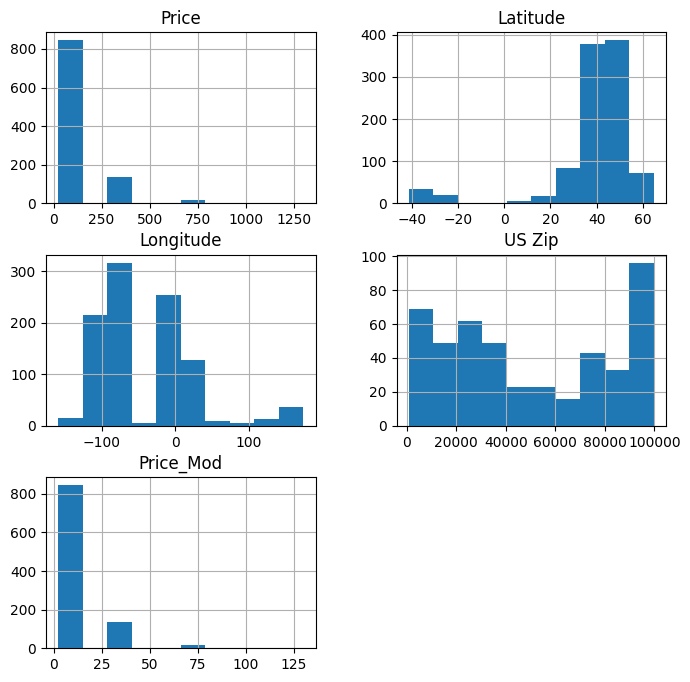

In [94]:
_ = df1.hist(figsize=(8,8))

<Axes: >

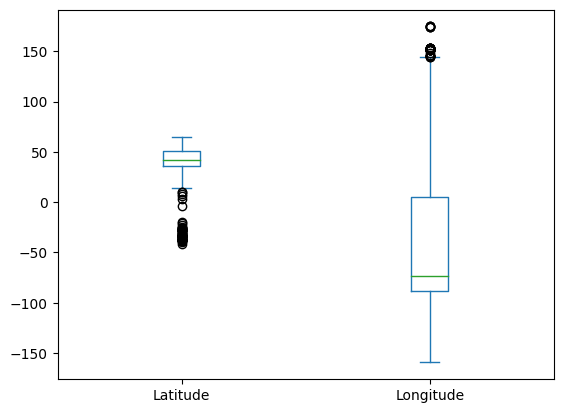

In [95]:
df1[['Latitude', 'Longitude']].plot.box()

<Axes: xlabel='Product', ylabel='Price'>

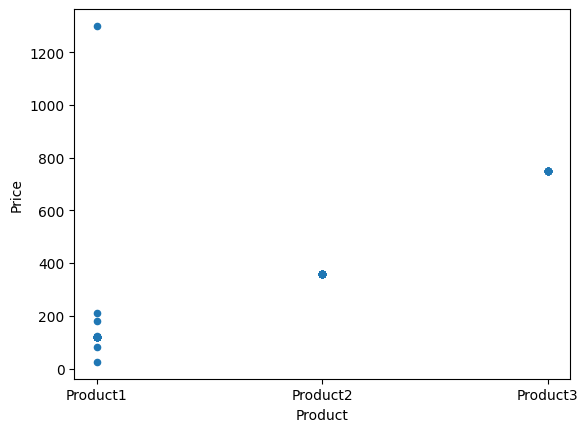

In [97]:
df1.plot.scatter(x='Product', y='Price')

<Axes: xlabel='Product'>

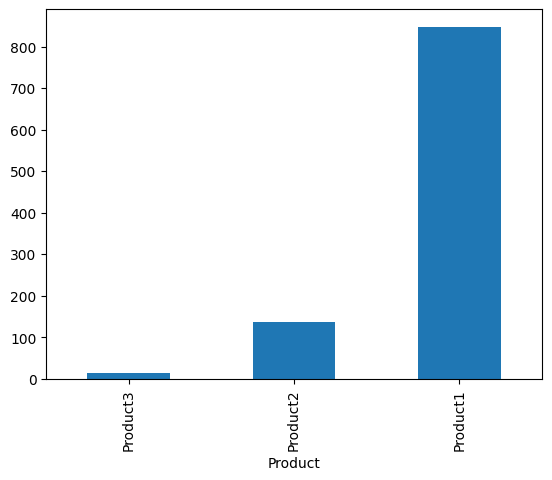

In [98]:
df1.groupby('Product')['Price'].count().sort_values(ascending=True).plot(kind='bar')

## Fill between

In [99]:
import matplotlib.pyplot as plt

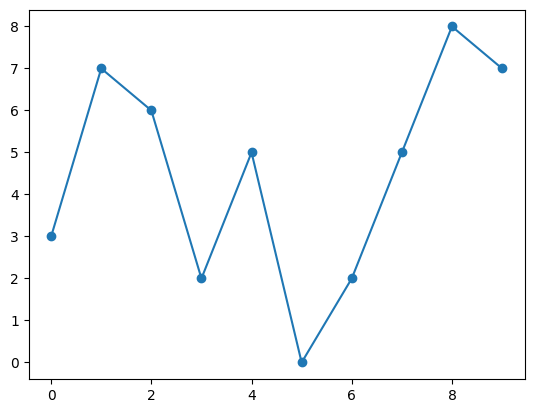

In [100]:
x = np.arange(10)
y = np.random.randint(10, size=10)

plt.plot(x,y, '-o')
plt.show()

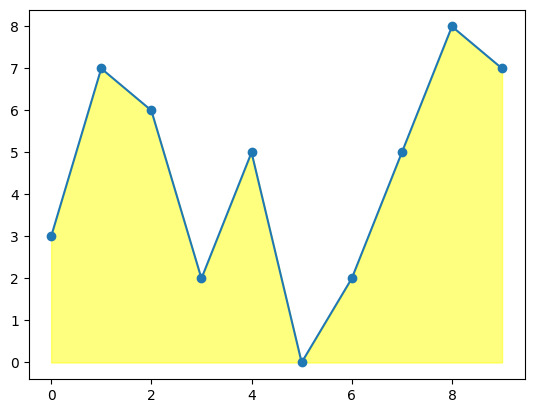

In [101]:
plt.plot(x,y, '-o')

plt.fill_between(x, y, color='yellow', alpha=0.5)
plt.show()